## Tensors
**Description:** Machine Learning (ML) generalization of vectors and matrics to any number of dimensions. (สามารถสรุปผลเวกเตอร์และเมทริกซ์ไปยังมิติใดๆก็ได้)

| Dimensions | Mathematical Name | Description                         |
|------------|-------------------|-------------------------------------|
| $0$        | Scalar            | Magnitude only, มีเพียงขนาด (ไม่มีทิศทาง)                    |
| $1$        | Vector            | Array                               |
| $2$        | Matrix            | Flat table (e.g., square)           |
| $3$        | $3$-tensor        | 3D table (e.g., cube)               |
| $n$        | $n$-tensor        | Higher-dimensional |
---------------------------------------------------------------------------------------------------------------------------------------------------------------

## Scalars
- No dimension
- Single number
- Denoted in lowercase, italics, e.g.: $\mathbf{x}$, ${x}$
- Should be typed, like all other tensors: e.g., int (integer), float

In [4]:
x_scalar = 25
print(type(x_scalar))

y_scalar = 3
print(type(y_scalar))

print(x_scalar+y_scalar)

<class 'int'>
<class 'int'>
28


## Scalars in PyTorch

In [5]:
import torch

x_torch_scalar = torch.tensor(25)
print(type(x_torch_scalar))
print(x_torch_scalar.shape)

<class 'torch.Tensor'>
torch.Size([])


- **PyTorch are designed to be pythonic**, so it's easier to use and learn. TensorFlow is for infrastructure.

---------------------------------------------------------------------------------------------------------------------------------------------------------------

## Vectors
- One-dimension array of numbers
- Denoted in lowercase, italics, bold, e.g., $\mathbf{x}$, ${x}$, *x*
- Arranged in an order, element can be accessed by its index `(idx)`
    - Elements are scalar (not bold), e.g., second element of $\mathbf{x}$ is ${x}_2$
- Representing a point in space: $[x_1,  \space x_2] = [12, \space 4]$
    - Vector of length: two, represents location in 2D matrix
    - Vector of length: three, represents location in 3D cube
    - Vector of n length, represents location in n-dimensional tensor

In [6]:
import numpy as np

x_vector = np.array([1,2,3]) #column
print(x_vector)
print(type(x_vector), len(x_vector), x_vector.shape)

[1 2 3]
<class 'numpy.ndarray'> 3 (3,)


`.shape` is an attribute to check for `np.array()` shape (or dimension)
and we could indexed it by using: e.g., `x_vector[0]` (as python start its index at 0), this will return 1 (int). 

---------------------------------------------------------------------------------------------------------------------------------------------------------------

## Vector Transpoition
- Example: 

$$[x_{1}, \space x_{2}, \space x_{3}]\top =
\begin{bmatrix}
x_{1} \\\\
x_{2} \\\\
x_{3}
\end{bmatrix}
$$

- Tranpsotion is denoted as $-\top$
- Transpose row vector $\to$ column vector, or column vector $\to$ row vector. (shape $(3,1)$ $\to$ shape $(1,3)$)


In [7]:
import numpy as np

print(x_vector.T, x_vector.T.shape)

y_vector = np.array([1,2,3,4]) #column
print(y_vector.shape, y_vector.T, y_vector.T.shape)

z_vector = np.array([[1,2,3], [4,5,6], [7,8,9]]) #rows and columns
print(z_vector.T)

[1 2 3] (3,)
(4,) [1 2 3 4] (4,)
[[1 4 7]
 [2 5 8]
 [3 6 9]]


`np.array()` for higher dimensions, it will needs more `[]`. so it defines both row, column.

---------------------------------------------------------------------------------------------------------------------------------------------------------------

## Zero Vectors
- Have no effects if added to another vectors

In [8]:
import numpy as np

print(np.zeros(3))

[0. 0. 0.]


Zero Vector can be defined using: `np.zeros(<value>)`

---------------------------------------------------------------------------------------------------------------------------------------------------------------

## Vectors in PyTorch

In [9]:
import torch

x_vector = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(x_vector.shape, len(x_vector))

torch.Size([3, 3]) 3


Torch use `torch.tensor()` to define array, similarly to NumPy.

---------------------------------------------------------------------------------------------------------------------------------------------------------------

## Norms
- Vector represent a magnitude (ขนาด) and direction from origin

- **Norm are function that quantify vector magnitude** (ฟังก์ชันที่ใช้วัดขนาดของเวกเตอร์)

---------------------------------------------------------------------------------------------------------------------------------------------------------------

## $L^{2}$ Norm (Euclidean Norm)
- Described by:

$$
\begin{equation}
\|x\|_2 = \sqrt{\sum_{i=1}^{n} x_i^2}
\end{equation}
$$

(**How it works**: square root of sum of all element that squared by 2)
- Measures simple (Euclidean) distance from origin
- Most common norm in Machine Learning
    - Insteaad of $\|x\|_2$, it can be denoted as $\|x\|$

In [10]:
import numpy as np

x_l2 = np.array([1,2,3])
print(((1**2) + (2**2) + (3**2))**(1/2))

#iterates through each element to computes euclidean norm.
summ = 0
for _ in range(len(x_l2)):
    summ += (x_l2[_]**2)

print(f'Iterates: {summ**(1/2)}')

#or use np.linalg.norm()
from numpy import linalg as LA
print(f'LA: {LA.norm(x_l2)}')
print(f'np.linalg.norm: {np.linalg.norm(x_l2)}') #this function will default to euclidean norm.

3.7416573867739413
Iterates: 3.7416573867739413
LA: 3.7416573867739413
np.linalg.norm: 3.7416573867739413


So this mean, vector `x_l2` has a length of $25.6$ meters.

As you can see: we could use many different ways to compute $L^2$ Norm:
- `np.linalg.norm()`  This is the easist way as this function default to $L^2$ Norm.
- Or simply use `from numpy import linalg as LA` (LA is common alias) and then `LA.norm()`.
- Or if you understand it just iterates through each element or if you know what element is inside just square each element by 2 and then sum it and square root.

---------------------------------------------------------------------------------------------------------------------------------------------------------------

## Unit Vector
- Special case of vector where its length is equal to $1$.
    - if $\|x\| = 1$, $x$ is unit vector.
- Technically, $x$ is a unit vector with "unit norm", i.e., $\|x\| = 1$

---------------------------------------------------------------------------------------------------------------------------------------------------------------

## $L^1$ Norm
- Described by:

$$
\begin{equation}
\|x\|_1 = \sum_{i=1}^{n} |x_i|
\end{equation}
$$

- Another common norm in Machine Learning
- Varies linearly at all locations whether near or far from origin
- Used whenever difference between zero and non-zero is key.

In [11]:
import numpy as np

x_l1 = np.array([1,2,3])
print(np.abs(1) + np.abs(2) + np.abs(3)) #basic

#or iterate through each element.
summ = 0
for _ in range(len(x_l1)):
    summ += (np.abs(x_l1[_]))
    
print(f'Iterates: {summ}')

#or using np.linalg.norm(, ord=1)
from numpy import linalg as LA
print(f'LA: {LA.norm(x_l2, ord=1)}')
print(f'np.linalg.norm: {np.linalg.norm(x_l2, ord=1)}')

6
Iterates: 6
LA: 6.0
np.linalg.norm: 6.0


So the $L^1$ norm result of this vector is $6$.

We can use `np.linalg.norm(, ord=1)` to specify which order of norm function will be use to compute. in this case it's $1$ for $L^1$ norm.

---------------------------------------------------------------------------------------------------------------------------------------------------------------

## Squared $L^2$ Norm
- Basically sum of all element squared by $2$ (without square root because this is squared $L^2$ norm).
- Described by:

$$
\begin{equation}
\|x\|_2^2 = \sum_{i=1}^{n} x_i^2
\end{equation}
$$

- Computationally cheaper to compute than $L^2$ norm because:
    - Squared $L^2$ Norm equals simply $x^\top{x}$ ($x$ tranposed multiplied with vector $x$)
    - Derivative (used to train many Machine Learning algorithms) of element $x$ , requires that element alone, whereas $L^2$ norm requires $x$ vector.
    อนุพันธ์ คำนวณจาก องค์ประกอบเดี่ยว $x$ เพียงตัวเดียวในขณะที่ ค่า $L^2$ Norm จำเป็นต้องใช้ เวกเตอร์ $x$ ทั้งชุด
- Downside is it grows slowly near origin, so can't be used if distinguishing between zero and near-zero is important.

ข้อเสียคือ ค่าจะเพิ่มขึ้นช้ามากใกล้จุดกำเนิด (origin) ดังนั้น ไม่เหมาะสำหรับกรณีที่ต้องแยกความแตกต่างระหว่างค่าเป็นศูนย์กับค่าใกล้ศูนย์อย่างชัดเจน

In [12]:
import numpy as np

x_sl2 = np.array([1,2,3])
print(f'Basic: {1**2 + 2**2 + 3**2}')

#iteration
summ = 0
for _ in range(len(x_sl2)):
    summ += (x_sl2[_]**2)
    
print(f'Iterates: {summ}')

#using LA or linalg.norm()
from numpy import linalg as LA
print(f'LA: {(LA.norm(x_sl2))**2}')
print(f'np.linalg.norm: {(np.linalg.norm(x_sl2))**2}')

Basic: 14
Iterates: 14
LA: 14.0
np.linalg.norm: 14.0


It's just $L^2$ norm with no square root, but with `np.linalg.norm(x)` we just need to square it up.
Or we can just use `np.dot()` to calculate this Squared $L^2$ Norm.

---------------------------------------------------------------------------------------------------------------------------------------------------------------

## Max Norm ($L^{\infty}$ Norm/Supremum Norm)
- Described by:

$$
\begin{equation}
\|x\|_{\infty} = \max_{i=1,\dots,n} |x_i|
\end{equation}
$$

- Also appear frequently in Machine Learning
- Returns the absolute value of the largest-magnitude element.

In [13]:
import numpy as np

x_max = np.array([1,2,3])
print(f'Basic: {np.max([np.abs(1), np.abs(2), np.abs(3)])}')

Basic: 3


It's basically maximum value of absoluted element in a vector.

---------------------------------------------------------------------------------------------------------------------------------------------------------------

## Generalized $L^{p}$ Norm
- Described by:

$$
\begin{equation}
\|x\|_p = \left( \sum_{i=1}^{n} |x_i|^p \right)^{\frac{1}{p}}, \quad p \ge 1
\end{equation}
$$

- If we want to calculate $L^2$ Norm, we can just enter `p = 2`:
    - $p$ must be real number.
    - Greater than or equal to $1$
- Can derive $L^1$, $L^2$, and $L^{\infty}$ norm formulae by substituting (แทนที่) $p$.

---------------------------------------------------------------------------------------------------------------------------------------------------------------

## Basis Vectors
- Can be scaled to represent any vector in a given vector space
- Typically use unit vector along axes of vector space

---------------------------------------------------------------------------------------------------------------------------------------------------------------

## Orthogonal Vectors
- $x$ and $y$ are orthogonal vector if $x^\top y = 0$
- Are at $\deg{90}$ angle to each other (assuming non-zero norms)
- n-dimensional space has max $n$ mutually orthogonal vector
    - Example: if it's 3 dimensional space then mostly it has maximum 3 mutually orthogonal vectors.
- **Orthogonal** vectors are orthogonal and all have unit norm
    - Basis vectors are an example.

In [14]:
import numpy as np

i_ortho = np.array([1,0])
j_ortho = np.array([0,1])
print(np.dot(i_ortho,j_ortho))

0


After `np.dot(i_ortho, j_ortho)`, it clearly showing that the result of dot product is 0, which relate to that $x$, $y$ are orthogonal if $x^\top y = 0$

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Matrices
- 2-dimensional array of numbers
- Denoted in uppercase, italics, bold
- height given priority ahead of width in notation, i.e., $(\text{n}_\text{rows}, \text{n}_\text{column})$
    - If $\mathbf{x}$ has 3 rows and 2 columns, it's shape/dimension is $(3,2)$
- Individual scalar elements denoted in uppercase, italics only
    - Element in top-right corner of matrix $\mathbf{x}$ above would be $\mathbf{x}_\text{1,2}$
- Colon represents an entire row or column:
    - Left column of matrix $\mathbf{x}$ is $\mathbf{x}_\text{:,1}$
    - Middle row of matrix $\mathbf{x}$ is $\mathbf{x}_\text{2,:}$

An example of matrix:

$$
\begin{bmatrix}
1 & 2 & 3 \\\\
4 & 5 & 6 \\\\
7 & 8 & 9
\end{bmatrix}
$$

In [15]:
import numpy as np

x_matrix = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(x_matrix.shape, x_matrix.size)

#basic indexings
for _ in range(3):
    print(x_matrix[0][_])

(3, 3) 9
1
2
3


## Matrics in PyTorch

In [16]:
import torch

x_matrix = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(x_matrix.shape, x_matrix.size)

torch.Size([3, 3]) <built-in method size of Tensor object at 0x7ffe7be53070>


It's just `torch.tensor()` and then inside `()`, it's similar to `np.array()`.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Generic Tensor Notation
- Uppercase, bold, italics, e.g., $\mathbf{x}$
- In a 4-tensor $\mathbf{x}$, element at position $\text{(i, j, k, l)}$ denoted as $\mathbf{x}_\text{(i, j, k, l)}$

As an example, rank 4 tensors are common for images, where each dimension corresponds to:
1. Number of images in training batches, e.g., 32
2. Image height in pixels, e.g., 28 for **MNIST Digits**
3. Image width in pixels, e.g., 28
4. Number of color channels, e.g., 3 for full-color images (RGB)

In [17]:
import torch

images = torch.zeros([32,28,28,3])
print(images, images.shape, images.size)

tensor([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         ...,

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0.

$32$ is for **batches**, $28, 28$ is for **height and width**, $3$ is for **color channels.** This tensor could determine an image after turn into a tensor.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Tensor Transposition
- Transpose of scalars itself, e.g., $x\top = x$
- Transpose of veector, converts column to row and vice versa (other)
- Scalar and vector transpostion are special cases of matrix transposition
    - Flip of axes over main diagional such that:
    $(\mathbf{x}\top)_\text{i, j} = \mathbf{x}_\text{j ,i}$

$$
\begin{bmatrix}
X_{1,1} & X_{1,2} \\\\
X_{2,1} & X_{2,2} \\\\
X_{3,1} & X_{3,2}
\end{bmatrix}^\top
=
\begin{bmatrix}
X_{1,1} & X_{2,1} & X_{3,1} \\\\
X_{1,2} & X_{2,2} & X_{3,2}
\end{bmatrix}
$$

In [18]:
import numpy as np

x_tensor = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(x_tensor.T)

[[1 4 7]
 [2 5 8]
 [3 6 9]]


Basically just row $\to$ column or column $\to$ row.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Basic Tensor Arithmetic
- Adding or multiplying with scalar applies operation to all elements and tensor shape is retained. (เก็บ)

In [19]:
import numpy as np

x_basic = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(x_basic+2)
print(x_basic*2)
print(x_basic*2+2)

[[ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]
[[ 4  6  8]
 [10 12 14]
 [16 18 20]]


In [20]:
import torch

x_basic = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(x_basic*2+2)

print(torch.add(torch.mul(x_basic, 2), 2))

tensor([[ 4,  6,  8],
        [10, 12, 14],
        [16, 18, 20]])
tensor([[ 4,  6,  8],
        [10, 12, 14],
        [16, 18, 20]])


**If 2 tensors have the same size, operations are often by default applied element-wise, This is not matrix multiplication**. But is rather **Hadamard Product** or simply element-wise product. The mathematical notation is $A \odot X$

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Tensor Reduction
- Calculating the sum across all elements of a tensor is a common operation. For example:
    - For vector $x$ of length $n$, we calculate sum of a set of value from the first value to the $n^\text{th}$ value.
    - For matrix $X$ with $m \times n$ dimensions, we calculate:
        1. Inner sum, sum across the column for a specific row
        2. Outer sum, repeats the process for every row and sum it all together.

In [21]:
import torch

x_reduction = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(x_reduction.sum())

print(torch.sum(x_reduction))

tensor(45)
tensor(45)


In [22]:
#can also be done along one specific axis alone
print(x_reduction.sum(axis=0)) #summing all rows
print(x_reduction.sum(axis=1)) #summing all columns

print(torch.sum(x_reduction, 0))

tensor([12, 15, 18])
tensor([ 6, 15, 24])
tensor([12, 15, 18])


Many other operations can be applied with reduction along all or selection of axes, e.g., maximum, minimum, mean, dot product.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Dot Product
- If we have 2 vectors, with the same length $n$, we can calculate the dot product between them. This is annotated several different ways, including the following:
    - $x \cdot y$
    - $x^\top y$
    - $(x, y)$

Regardless which notation we use, **the calculation is the same**. We calculate products in an element-wise fashion and then sum reductively across the product to a scalar value.

In [23]:
import numpy as np

x_dot = np.array([[1,2,3], [4,5,6], [7,8,9]])
y_dot = np.array([[0,1,2], [4,5,6], [3,2,1]])
print(np.dot(x_dot, y_dot))

[[17 17 17]
 [38 41 44]
 [59 65 71]]


In [24]:
import torch

x_dot = torch.tensor([6,7.,7])
y_dot = torch.tensor([4,5.,7])
print(torch.dot(x_dot, y_dot)) #require 1D tensor, not 2D which its shape must be (,1) or (1,) and must be float or else must be all #int

tensor(108.)


In PyTorch, for `torch.dot()` the tensor must be 1D and must be float in all tensor if 1 contains 1 float, else if every tensors is #int, we need to ensure that all elements are #int.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Frobenius Norm
- Described by:

$$
\|X\|_F = \sqrt{\sum_{i=1}^{m}\sum_{j=1}^{n} |x_{ij}|^2}
$$

- Analogous (คล้ายคลึงกัน) to $L^2$ Norm of vector
- Measure the size of matrix in terms of Euclidean Distance
    - It's the sum of the magnitude of all vectors in $X$

In [25]:
import numpy as np
from numpy import linalg as LA

x_frobenius = np.array([[1,2], [3,4]])
print(f'Basic: {(1**2 + 2**2 + 3**2 + 4**2)**1/2}')

print(f'np.linalg.norm(): {np.linalg.norm(x_frobenius, ord=2)}')
print(f'LA: {LA.norm(x_frobenius, ord=2)}')

import torch
x_frobenius = torch.tensor([[1.,2], [3,4]]) #PyTorch requires float.
print(f'torch.norm(): {torch.norm(x_frobenius)}')

Basic: 15.0
np.linalg.norm(): 5.464985704219043
LA: 5.464985704219043
torch.norm(): 5.4772257804870605


Basically it's just like $L^2$ Norm, we can use `np.linalg.norm(x, ord=2)` to calculate this like we use in $L^2$ Norm. and it's just sum of every elements square by 2 and then square root of 2

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Matrix Multiplication with Vector

- Example:

$$
\begin{bmatrix}
1 & 2 \\\\
3 & 4 \\\\
5 & 6
\end{bmatrix}
\times
\begin{bmatrix}
1 \\\\
2
\end{bmatrix}
=
\begin{bmatrix}
1 \times 1 + 2 \times 2 \\\\
3 \times 1 + 4 \times 2 \\\\
5 \times 1 + 6 \times 2
\end{bmatrix}
=
\begin{bmatrix}
5 \\\\
11 \\\\
17
\end{bmatrix}
$$

In [26]:
import numpy as np

x_matrix = np.array([[1,2], [3,4], [5,6]])
y_matrix = np.array([1,2])
print(np.dot(x_matrix, y_matrix))

import torch
x_matrix = torch.tensor([[1,2], [3,4], [5,6]])
y_matrix = torch.tensor([1,2])
print(torch.matmul(x_matrix, y_matrix))

[ 5 11 17]
tensor([ 5, 11, 17])


For the matrix by vector, we can use `np.dot()` for calculation.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Matrix-by-Matrix Multiplication

In [27]:
import numpy as np

x_matrix = np.array([[1,2], [3,4], [5,6]])
y_matrix = np.array([[1,2], [3,4]])
print(np.dot(x_matrix, y_matrix))

x_matrix, y_matrix = torch.from_numpy(x_matrix), torch.from_numpy(y_matrix) #convert numpy array to torch.tensor() but not redefining the same variable, just convert.
print(torch.matmul(x_matrix, y_matrix))

[[ 7 10]
 [15 22]
 [23 34]]
tensor([[ 7, 10],
        [15, 22],
        [23, 34]])


Matrix Multiplication is not communative, so `np.dot(a,b)` $\neq$ `np.dot(b,a)`

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Symmetric Matrix

- Has to be square matrix ($n \times n$ dimensions)
- $x^\top x = x$
- Example:

$$
\begin{bmatrix}
1 & 2 & 3 \\\\
4 & 5 & 6 \\\\
7 & 8 & 9
\end{bmatrix}
$$

In [28]:
import numpy as np

x_sym = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(f'Transpose: \n{x_sym.T}')

Transpose: 
[[1 4 7]
 [2 5 8]
 [3 6 9]]


When transpose, it's just like move column to row and row to column so that symmetric matrix would still be equal.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Identity Matrix

- Is a symmetric matrix where:
    - Every element along main diagsional is $1$
    - All others element are $0$
    - Notation: $I_{n}$, where $n$ = height or width
    - $n$-length vector unchanged if multiplied by $I_{n}$

- Example:

$$
\begin{bmatrix}
1 & 0 & 0 & 0 \\\\
0 & 1 & 0 & 0 \\\\
0 & 0 & 1 & 0 \\\\
0 & 0 & 0 & 1
\end{bmatrix}
$$

In [29]:
import torch

x_identity = torch.tensor([[1,0,0], [0,1,0], [0,0,1]])
y_dummy = torch.tensor([1,2,3])
print(torch.matmul(x_identity, y_dummy))

tensor([1, 2, 3])


So identity Matrix is a matrix where its main diagsional is $1$ and the notation $I_{n}$; $n$ is the dimension of the identity matrix (symmetrical).

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Matrix Multiplication

- Example:

$$
\begin{bmatrix}
1 & 2 \\\\
3 & 4 \\\\
5 & 6
\end{bmatrix}
\times
\begin{bmatrix}
1 \\\\
2
\end{bmatrix}
=
\begin{bmatrix}
5 \\\\
11 \\\\
17
\end{bmatrix}
$$

In [ ]:
import numpy as np

x_matrix = np.array([[1,2], [3,4], [5,6]])
y_matrix = np.array([1,2])
print(np.matmul(x_matrix, y_matrix))

[ 5 11 17]


As the dimensions of the first matrix is $3 \times 2$ and the second matrix have the dimensions of $2 \times 1$, so the dimensions of the result will be $3 \times 1$. (vector)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Matrix Inversion

- Basically matrix inversion is just:

$$A^{-1} = \frac{1}{\det(A)} \, \operatorname{adj}(A)$$

- **$\text{det}$ or determinant**
- **$\text{adj}$ or adjugate.**

But this is computationally costly and expensive, with `np.linalg.inv(A)`, consider using `np.linalg.solve()` as `.inv` method is rarely use in ML field.
- Example of $2 \times 2$ square matrix inversion:

$$
A^{-1} = \frac{1}{ad - bc}
\begin{pmatrix}
 d & -b \\
 -c & a
\end{pmatrix}
$$

- $\frac{1}{ad - bc}$ - $\text{det(A)}$
- The right side matrix is basically adjugate matrix. where badically the left diagsional or $x_{1,1}$ and $x_{2,2}$ will switch place. and the other 2 elements will become negative.

In [37]:
import numpy as np

x_inverse = np.array([[-4,2], [5,3]])
print(np.linalg.inv(x_inverse))

y_inverse = np.array([4,-7])
w_inverse = np.dot((np.linalg.inv(x_inverse)), y_inverse)
print(y_inverse)
print(w_inverse)

print(np.linalg.solve(x_inverse, y_inverse))

[[-0.13636364  0.09090909]
 [ 0.22727273  0.18181818]]
[ 4 -7]
[-1.18181818 -0.36363636]
[-1.18181818 -0.36363636]


In [1]:
import torch

print(torch.inverse(torch.tensor([[-4,2], [5,3.]])))

tensor([[-0.1364,  0.0909],
        [ 0.2273,  0.1818]])


Matrix inversion can only be calculate if matrix isn't singular, so $\text{det(A)} \neq 0$.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Diagonal Matrix
- Non-zero elements along main diagonal. Zeros everywhere else like identity matrix
- If square, denoted as $\text{diad(x)}$ where $x$ is vector of main-diagsional elements
- Computationally efficient:
    - Multiplication: $\text{diag(x)}y = x \odot y$
    - Inversion: $\text{diag(x)}^{-1} = \text{diag}[1/x_{1}, ... , 1/x_{n}]^\top$ (Can't divide by 0, so $x$ can't include zero.)
- Can be non-square and computationally still efficient:
    - If height > width, simply add zeros to product
    - IF height < width, removes elements from product

$$
\begin{bmatrix}
1 & 0 & 0 & 0 \\\\
0 & 1 & 0 & 0 \\\\
0 & 0 & 1 & 0 \\\\
0 & 0 & 0 & 1
\end{bmatrix}
$$

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Orthogonal Matrix

- $A^\top A = AA^\top = I$ (Identity Matrix)
- Matrix must be square ($n \times n$ dimensions)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Affine Transformations

- การแปลงทางคณิตศาสตร์ที่เปลี่ยนตำแหน่งของจุดในระนาบหรือในอวกาศ โดยยังคงรักษา “ความเป็นเส้นตรง” และ “ความขนาน” เอาไว้ แต่สามารถเปลี่ยนขนาด มุม หรือรูปร่างได้
- กล่าวง่ายๆ คือ ส้นตรงยังคงเป็นเส้นตรง และเส้นที่ขนานกันยังคงขนานกัน หลังการแปลง

**ตัวอย่างการเปลี่ยนแปลง:**
- Translation (การเลื่อนตำแหน่ง): $(x, y) \to (x+3, y+3)$
- Scaling (การย่อ/ขยาย): $(x, y) \to (2x, 2y)$
- Rotation (การหมุน): หมุนวัตถุรอบจุดที่กำหนด
- Shearing (การเฉือน): ทำให้รูปเอียง
- Reflection (การสะท้อย): สะท้อนเหมือนกระจก

**สิ่งที่ยังคงอยู่:**
- เส้นตรงหรือยังเป็นเส้นตรง
- ยังคงชนานกัน
- อัตราส่วนบนเส้นเดียวกันยังคงอยู่

**สิ่งที่อาจเปลี่ยน:**
- ความยาว
- มุม
- พื้นที่

Original Image:


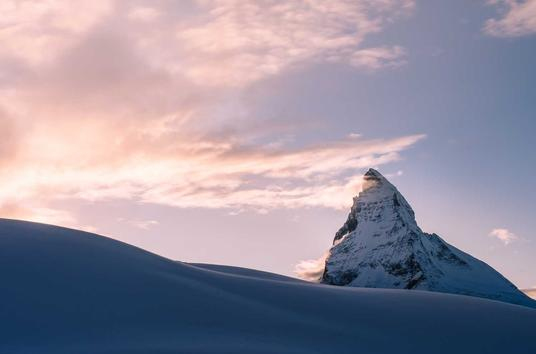

Transformed Image:


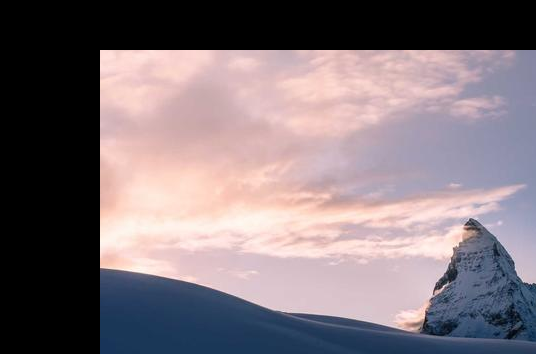

In [1]:
from PIL import Image
import numpy as np

image = Image.open('sources/example.jpg')

# Define translation (move right 100, down 50)
# Note: PIL uses the inverse transformation matrix for 'transform'
# To move the image, we provide the negative offset
x, y = 100, 50
translation_matrix = (1, 0, -x, 0, 1, -y)

# Apply transformation
# image.size returns (width, height)
result = image.transform(
    image.size, 
    Image.AFFINE, 
    translation_matrix, 
    resample=Image.BICUBIC
)

# Display in Jupyter/VS Code (No need for cv2.imshow)
print("Original Image:")
display(image)

print("Transformed Image:")
display(result)

After showing the result, we can see that the image move to the left and move down a bit. 